In [1]:
#import packages
import pandas as pd
import numpy as np

In [2]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('data/cal.csv')

#print the head
df.head()

,Date,Share Code,High,Low,Previous,Open,Close,Total Shares Traded,Last
0,1/3/2017,CAL,0.76,0.76,0.75,0.75,0.76,10500,0.76
1,1/4/2017,CAL,0.78,0.76,0.76,0.76,0.78,17300,0.78
2,1/5/2017,CAL,0.78,0.76,0.78,0.78,0.78,4500,0.78
3,1/6/2017,CAL,0.78,0.76,0.78,0.78,0.77,133700,0.76
4,1/9/2017,CAL,0.78,0.76,0.77,0.77,0.76,16200,0.76


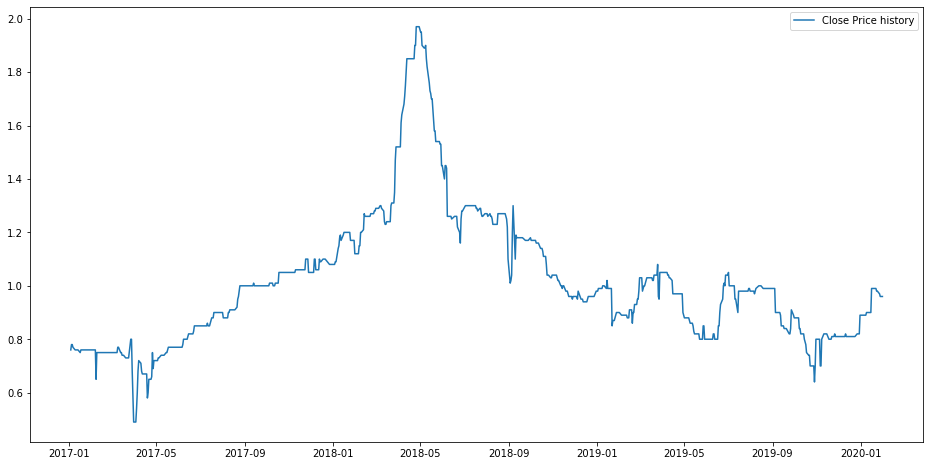

In [5]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%m/%d/%Y')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')
plt.legend(loc='best')


## Moving Average

In [6]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [7]:
# splitting into train and validation
train = new_data[:612]
valid = new_data[612:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)



 Shape of training set:
(612, 2)

 Shape of validation set:
(153, 2)


In [8]:
# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)




 RMSE value on validation set:
0.11849404516709106


C:\Users\CodeBug\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\CodeBug\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


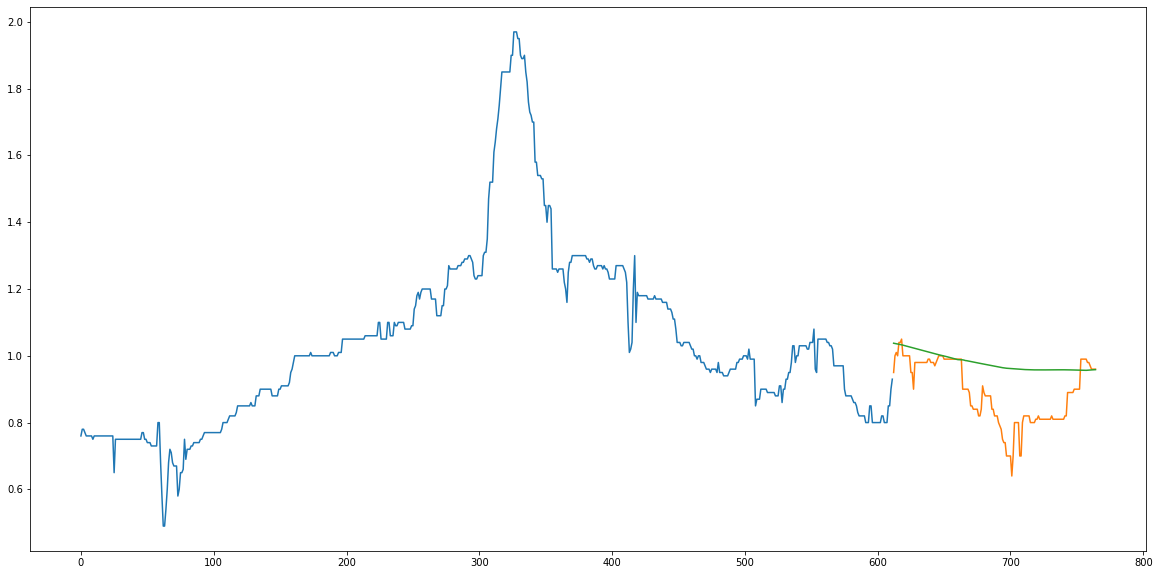

In [9]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

## Linear Regression

In [10]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

In [11]:


#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]


In [12]:
#conda install -c pytorch -c fastai fastai

In [13]:
#!pip install fastai

In [14]:
#create features
from fastai.tabular import add_datepart
#from fastai.structured import  
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

In [15]:
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

C:\Users\CodeBug\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\CodeBug\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [16]:
#split into train and validation
train = new_data[:612]
valid = new_data[612:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Results

In [17]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

0.32470397808479096

C:\Users\CodeBug\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\CodeBug\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


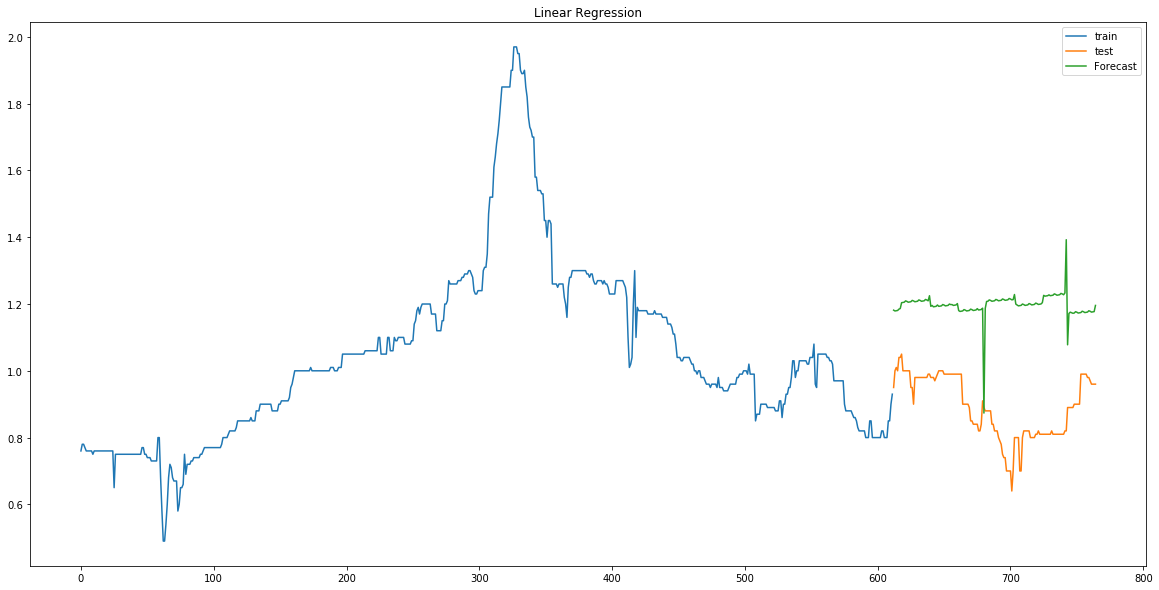

In [18]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[612:].index
train.index = new_data[:612].index
plt.title("Linear Regression")
plt.plot(train['Close'], label = "train")
plt.plot(valid['Close'],  label = "test")
plt.plot(valid['Predictions'], label = "Forecast")
plt.legend(loc='best')

## Arima

In [19]:
#!pip install pmdarima

In [20]:
from pmdarima import auto_arima

data = df.sort_index(ascending=True, axis=0)

train = data[:612]
valid = data[612:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=153)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])


Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=-2537.456, BIC=-2515.479, Time=6.083 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=-2155.413, BIC=-2146.622, Time=0.241 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=-2324.201, BIC=-2306.620, Time=2.288 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=-2539.354, BIC=-2521.773, Time=3.113 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=-2157.395, BIC=-2153.000, Time=0.209 seconds
Fit ARIMA(1,1,1)x(0,1,0,12) [intercept=True]; AIC=-2151.532, BIC=-2133.951, Time=0.421 seconds
Fit ARIMA(1,1,1)x(1,1,1,12) [intercept=True]; AIC=-2535.703, BIC=-2509.331, Time=3.961 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border 

C:\Users\CodeBug\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1886: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\CodeBug\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:33: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.arroots()))
C:\Users\CodeBug\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1893: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
C:\Users\CodeBug\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:35: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.maroots()))


Fit ARIMA(1,1,0)x(0,1,1,12) [intercept=True]; AIC=-2539.405, BIC=-2521.824, Time=2.545 seconds
Near non-invertible roots for order (1, 1, 0)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(2,1,1)x(0,1,1,12) [intercept=True]; AIC=-2535.119, BIC=-2508.748, Time=3.812 seconds
Near non-invertible roots for order (2, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(1,1,2)x(0,1,1,12) [intercept=True]; AIC=-2467.019, BIC=-2440.647, Time=1.810 seconds
Fit ARIMA(0,1,0)x(0,1,1,12) [intercept=True]; AIC=-2538.411, BIC=-2525.225, Time=1.869 seconds
Near non-invertible roots for order (0, 1, 0)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(0,1,2)x(0,1,1,12) [intercept=True]; AIC=-2531.233, BIC=-2509.256, Time=3.294 seconds
Near non-invertible roots for order (0, 1, 2)(0,

# Result

In [21]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

0.17084088278650297

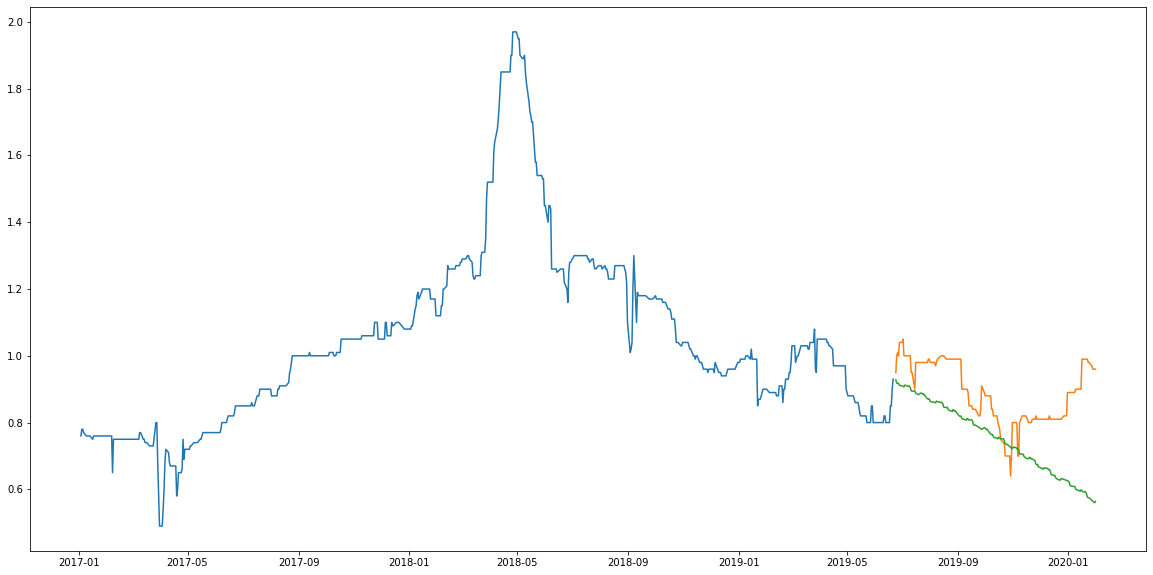

In [22]:
#plot
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

In [24]:
#!conda install -c conda-forge fbprophet -y

In [26]:
!pip install --upgrade plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=4c42a628f888132d9f4e47640b10a8cc92d1a2871c57f99f8aa40f7cf4f8a87d
  Stored in directory: c:\users\codebug\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


## Prophet

In [29]:
#importing prophet
from fbprophet import Prophet

#creating dataframe
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data['Date'] = pd.to_datetime(new_data.Date,format='%m-%d-%Y')
new_data.index = new_data['Date']

#preparing data
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

#train and validation
train = new_data[:612]
valid = new_data[612:]

#fit the model
model = Prophet()
model.fit(train)

#predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Results

In [31]:
#rmse
forecast_valid = forecast['yhat'][612:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

0.2948320338330615

C:\Users\CodeBug\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\CodeBug\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


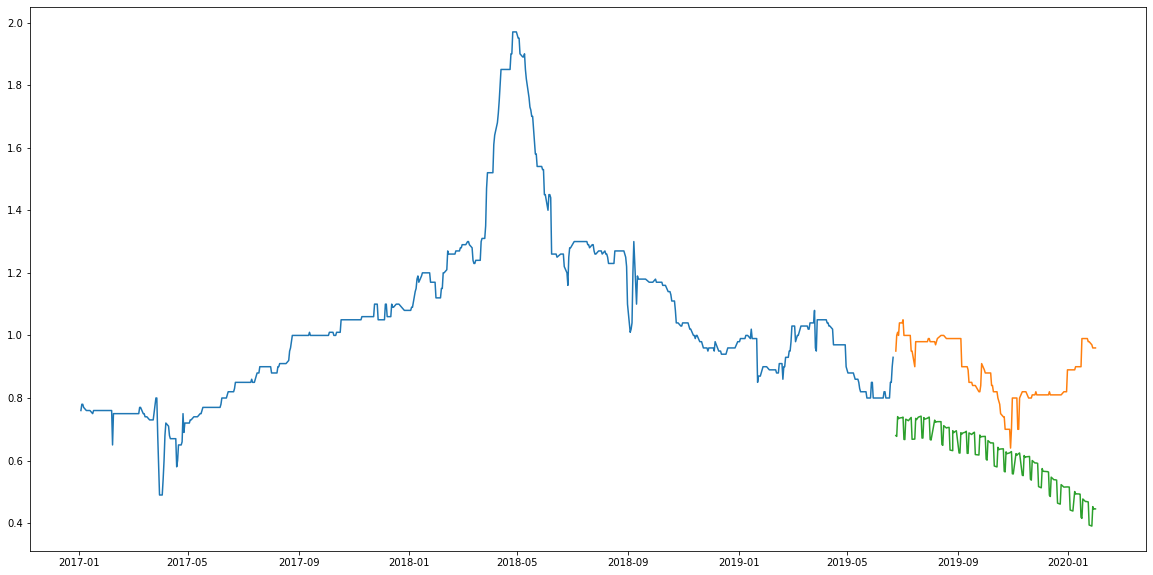

In [32]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])

## LSTM

In [ ]:
#conda install tensorflow

In [ ]:
#conda install keras

In [21]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:612,:]
valid = dataset[612:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=5, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Using TensorFlow backend.
C:\Users\CodeBug\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\CodeBug\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\CodeBug\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\CodeBug\anaconda3\lib\site-packages\tensorflow\python\framework\d


Epoch 1/5
 - 21s - loss: 0.0067
Epoch 2/5
 - 20s - loss: 0.0020
Epoch 3/5
 - 19s - loss: 0.0015
Epoch 4/5
 - 19s - loss: 0.0013
Epoch 5/5
 - 19s - loss: 0.0013


## Results

In [22]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

0.04702705070645007

C:\Users\CodeBug\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


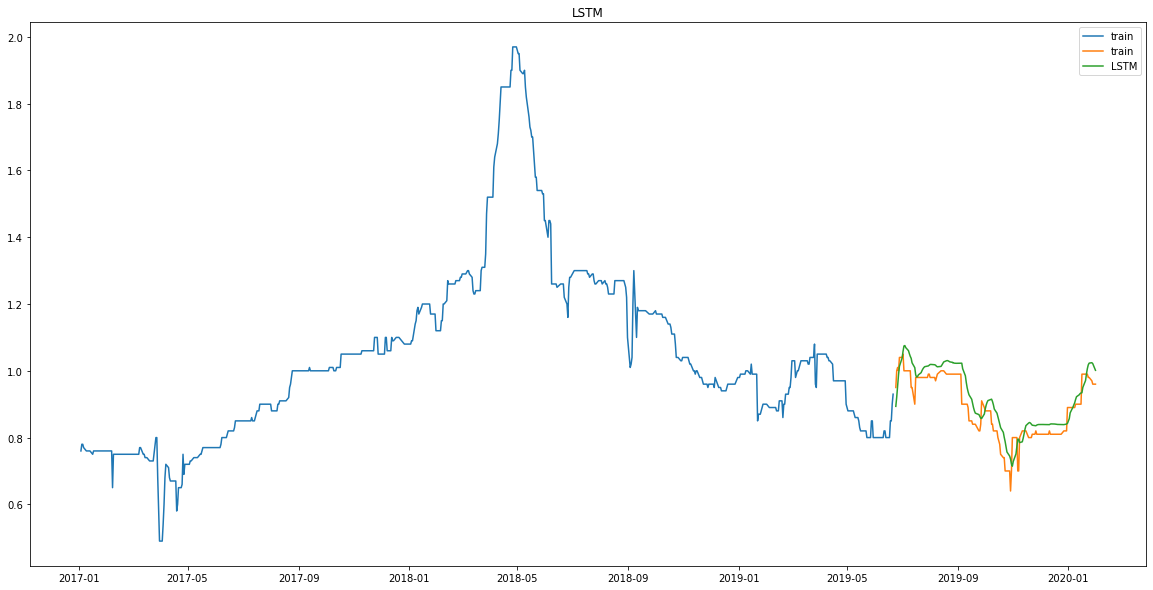

In [24]:
#for plotting
train = new_data[:612]
valid = new_data[612:]
plt.title("LSTM")
valid['Predictions'] = closing_price
plt.plot(train['Close'], label = "train")
plt.plot(valid['Close'],label = "train")
plt.plot(valid['Predictions'],label = "LSTM")
plt.legend(loc='best')